# CAPSTONE PROJECT SUBMISSION

* Student name: Gabriel Araujo
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL: 

# TABLE OF CONTENTS

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[INTRODUCTION](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB & EXPLORE](#SCRUB-&-EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[CONCLUSIONS & FUTURE WORK](#CONCLUSIONS-&-FUTURE-WORK)<br>**
</font>

# INTRODUCTION

The contents of this repository detail an analysis of the Flatiron Data Science Capstone project. This analysis is detailed in hopes of making the work accessible and replicable.

## Business Problem

On 18 August 2008, the domain name bitcoin.org was registered. Bitcoin is a cryptocurrency, a digital asset designed to work as a medium of exchange that uses cryptography to control its creation and management, rather than relying on central authorities. When this currency was first created, each coin was worth basically nothing. Today, a single coin is worth over $50,000.00. Most people, with myself included, have difficulties in understanding the reason for this high value, mainly because it is not a physical product and it isn't accepted by most banks and companies yet.

News such as the ones below makes me wonder, maybe Bitcoin is just a fad that is highly influenced on the comments of powerful and influential people. Perhaps, regular people see billionaires like Elon Musk and Mark Cuban making positive comments regarding Bitcoin and think: "If these guys, who are rich and powerful, believe in Bitcoin, it means that it must be really profitable and I could become rich like them.", when in reality, it isn't worth anything.

![graph1](./images/mark_cuban_news.png)
<br>
![graph2](./images/Elon_musk_news.png)
<br>
![graph3](./images/Elon_musk_news_2.png)



In this notebook, tweets from highly influential and powerful people, specially in the cryptocurrency community,  will be analyzed to determine if in fact their comments have an effect on the price of the biggest cryptocurrency  in the world today.

## Goals

The goals of this project are:

- Successfully scrappe archived tweets.
- Determine if influential and powerful individuals do actually have an impact of the price of Bitcoin by analyzing their Twitter comments.
- Determine the best method to analyze and model tweets.

## Data

Two datasets being analyzed in this project are Bitcoin Tweets and Bitcoin Hourly Historical Data. Bitcoin Tweets dataset was extracted from Twitter using Twint. Bitcoin Hourly Historical Data was downloaded from http://www.cryptodatadownload.com/data/gemini/ 

Bitcoin Tweets dataset consists of 6 features and 33,962 unique tweets that date to the year 2008.

Bitcoin Hourly Historical dataset consists of 4 features and 47,431 price observations that date back to the year 2008.

## Method

<font size = "4"> **Analysis Framework** </font>

This project will use the OSEMN framework (outlined in brief below)

**Obtain**
 
- Scrape tweets using Twint.
- Obtain historical Bitcoin price data.

**Scrub**
 
- Remove unwanted features (id, conversation_id, timezone, etc...).
- Fill/remove null values.
- Remove stop words from corpus.
- Remove mentions, retweets, emojis, and URLs.

**Explore**

- Lemmatize/Stem Word Tokens.
- Examine outliers text.
- Create Word Cloud.
- Interactive plots.


**Model**
- Random Forests Classifier.
- Naive Bayes.
- Deep NLP.

**Interpret**
- Results.
- Recommendations and Future Work.

# OBTAIN

## Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import itertools
import os
from PIL import Image
import warnings
import re
from textblob import TextBlob
warnings.filterwarnings('ignore')
import twint
import datetime
import nest_asyncio
from ipywidgets import interact
from collections import Counter
nest_asyncio.apply()
%matplotlib inline

#NLTK PACKAGE
import nltk
nltk.download('vader_lexicon')
from nltk import word_tokenize, regexp_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer

#SKLEARN PACKAGE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import ComplementNB

#KERAS PACKAGE
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM,Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.utils import to_categorical

#BOKEH PACKAGE
from bokeh.layouts import layout
from bokeh.models import HoverTool
from bokeh.plotting import figure, show

#GEMSIM PACKAGE
from gensim.utils import simple_preprocess

#WORDCLOUD PACKAGE
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#LIME PACKAGE
from lime import lime_text
from lime.lime_text import LimeTextExplainer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\Biel_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


## Twint

Twint is an advanced Twitter scraping tool written in Python that allows for scraping Tweets from Twitter profiles without using Twitter's API. <br><br>Twint utilizes Twitter's search operators to let you scrape Tweets from specific users, scrape Tweets relating to certain topics, hashtags & trends, or sort out sensitive information from Tweets like e-mail and phone numbers. Twint also makes special queries to Twitter allowing you to also scrape a Twitter user's followers, Tweets a user has liked, and who they follow without any authentication, API, Selenium, or browser emulation.<br><br>For more information, access https://pypi.org/project/twint/.

<font size = "1">**Information taken Twint website (https://pypi.org/project/twint/).**</font>

In [2]:
#USING TWINT TO GET TWEETS MENTIONING THE WORD BITCOIN AND CRYPTOCURRENCY
#FROM INFLUENCIAL PEOPLE
# c = twint.Config()
# c.Store_csv = True
# c.Output = "tweets_3.csv"
# c.Lang = "en"
# c.Search = '(BTC OR bitcoin OR crypto OR cryptocurrency) (from:CNN OR from:FoxNews OR from:coinbase OR from:BTCTN OR from:cz_binance OR from:aplusk OR from:tyler OR from:cameron OR from:elonmusk OR from:mcuban OR from:Nouriel OR from:binance OR from:barrysilbert OR from:rogerkver OR from:brian_armstrong OR from:SatoshiLite OR from:erikvoorhees OR from:APompliano)'
# twint.run.Search(c)
# # # from:CNN OR from:FoxNews OR from:coinbase OR from:BTCTN OR from:cz_binance OR 

## Tweet Data Frame

This project will utilize a mixture of text and numerical data. The feature that will be analyzed the most is the tweet text located in the tweet column. The Date column will be used to merge the data frame with the Bitcoin Hourly Historical Dataset.

In [3]:
#IMPORTING CSV FILE
df_tweet = pd.read_csv('tweets_3.csv', low_memory=False)

#LIST COLUMNS NAMES THAT WILL BE UTILIZED
columns = ['created_at','tweet','name','replies_count','retweets_count','likes_count']

#CREATING A NEW DF WITH ONLY WANTED COLUMNS
df_tweet = df_tweet[columns]

#REPLACE SPACE WITH _ ON NAMES SO THEY ARE ALL ONE WORD
for i in range(0,len(df_tweet)):
    df_tweet['name'][i] = df_tweet['name'][i].replace(' ','_')
    
#CHANGING CREATED_AT DATA FROM STRING TO DATETIME
df_tweet['created_at'] = pd.to_datetime(df_tweet['created_at'])

#RENAMING CREATED_AT COLUMN TO DATE
df_tweet.rename(columns = {'created_at':'Date'},inplace=True)

#ROUNDING TWEET TIME TO NEAREST HOUR FOR FUTURE MERGER
df_tweet['Date'] = df_tweet['Date'].round('H')
    
#DISPLAY DF_TWEET
df_tweet

,Date,tweet,name,replies_count,retweets_count,likes_count
0,2021-03-10 14:00:00,Three #bitcoin #ETFs have been approved in Nor...,Bitcoin_News,8,33,98
1,2021-03-10 13:00:00,The House to vote on $1.9 trillion dollar adve...,Tyler_Winklevoss,53,151,1300
2,2021-03-10 13:00:00,Going LIVE with @LMAX Group CEO @mercerdavid t...,Pomp_🌪,12,18,93
3,2021-03-10 13:00:00,"Ternoa (CAPS), Transmit Your Memories and Priv...",Bitcoin_News,2,9,13
4,2021-03-10 13:00:00,#bitcoin brings scarcity to digital money. NFT...,Cameron_Winklevoss,72,80,645
...,...,...,...,...,...,...
33957,2011-07-18 17:00:00,Ruxum: Wall Street Level Security Comes To #Bi...,Erik_Voorhees,0,0,1
33958,2011-07-13 12:00:00,Via @nprnews: The Tuesday Podcast: #Bitcoin | ...,Erik_Voorhees,0,0,0
33959,2011-07-04 04:00:00,ビットコインフォーラムをUPしました！ www.Bitcoin.co.jp/forum #b...,Roger_Ver,1,0,4
33960,2008-08-11 09:00:00,BUSINESS: Fire On BTC Oil Pipeline Is Put Out:...,Fox_News,0,0,0


## Bitcoin Hourly Historical Data Frame

The hourly price change in this dataset will be used as the target for all models in this notebook.

In [4]:
#IMPORTING BITCOIN HOURLY HISTORICAL DATA
df_bitcoin = pd.read_csv('Bitcoin Hourly Historical Data.csv', low_memory=False)

# LIST OF UNWANTED COLUMNS
drop_columns = ['Open','High','Low','Volume']

#DROPPING UNWANTED COLUMNS
df_bitcoin.drop(drop_columns, axis=1,inplace=True)

#CHANGING DATE COLUMN TO DATETIME
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])

#LOOKING AT BITCOIN DATAFRAME
df_bitcoin

,Date,Close,hour_change,24hr_change,24hr_log_diff
0,2021-03-06 00:00:00,48839.03,0.134807,0.954170,0.009496
1,2021-03-05 23:00:00,48773.28,-0.669302,-0.416460,-0.004173
2,2021-03-05 22:00:00,49101.92,0.078796,-0.162627,-0.001628
3,2021-03-05 21:00:00,49063.26,-0.335639,-1.281128,-0.012894
4,2021-03-05 20:00:00,49228.49,-0.251153,-1.545840,-0.015579
...,...,...,...,...,...
47403,2015-10-08 18:00:00,244.00,-0.404098,-0.526552,-0.005279
47404,2015-10-08 17:00:00,244.99,0.302968,-0.225179,-0.002254
47405,2015-10-08 16:00:00,244.25,-0.273559,-0.375633,-0.003763
47406,2015-10-08 15:00:00,244.92,-0.032653,-0.408163,-0.004090


# SCRUB & EXPLORE

## Tweet Data Frame

In [5]:
#LOOKING AT COLUMNS DATA TYPES
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33962 entries, 0 to 33961
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            33962 non-null  datetime64[ns]
 1   tweet           33962 non-null  object        
 2   name            33962 non-null  object        
 3   replies_count   33962 non-null  int64         
 4   retweets_count  33962 non-null  int64         
 5   likes_count     33962 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.6+ MB


In [6]:
df_tweet

,Date,tweet,name,replies_count,retweets_count,likes_count
0,2021-03-10 14:00:00,Three #bitcoin #ETFs have been approved in Nor...,Bitcoin_News,8,33,98
1,2021-03-10 13:00:00,The House to vote on $1.9 trillion dollar adve...,Tyler_Winklevoss,53,151,1300
2,2021-03-10 13:00:00,Going LIVE with @LMAX Group CEO @mercerdavid t...,Pomp_🌪,12,18,93
3,2021-03-10 13:00:00,"Ternoa (CAPS), Transmit Your Memories and Priv...",Bitcoin_News,2,9,13
4,2021-03-10 13:00:00,#bitcoin brings scarcity to digital money. NFT...,Cameron_Winklevoss,72,80,645
...,...,...,...,...,...,...
33957,2011-07-18 17:00:00,Ruxum: Wall Street Level Security Comes To #Bi...,Erik_Voorhees,0,0,1
33958,2011-07-13 12:00:00,Via @nprnews: The Tuesday Podcast: #Bitcoin | ...,Erik_Voorhees,0,0,0
33959,2011-07-04 04:00:00,ビットコインフォーラムをUPしました！ www.Bitcoin.co.jp/forum #b...,Roger_Ver,1,0,4
33960,2008-08-11 09:00:00,BUSINESS: Fire On BTC Oil Pipeline Is Put Out:...,Fox_News,0,0,0


In [7]:
df_tweet['name'].value_counts()

Bitcoin_News          12090
Pomp_🌪                 5688
Erik_Voorhees          4601
Charlie_Lee_           2046
Roger_Ver              1822
Barry_Silbert          1637
Binance                1527
Nouriel_Roubini        1176
Tyler_Winklevoss       1072
Coinbase                729
CZ_🔶_Binance            567
Cameron_Winklevoss      517
CNN                     254
Mark_Cuban              124
Brian_Armstrong          49
Elon_Musk                29
Fox_News                 24
ashton_kutcher            8
Floyd_Mayweather          2
Name: name, dtype: int64

### Tweet Cleaning

The first model that will be presented in this notebook will be a Random Forest classifier that will not analyze the tweet text like an NLP model. For the first model, the input variables will be the sentiment of the tweet, name of the author,length of tweet, and the number of replies, retweets, and likes that specific tweet received. In order to achieve that, the tweets will be cleaned and analyzed throughly.<br><br>
**Preparing text data requires more processing than normal data.**
1. The following things must be removed:
    - Punctuation
    - Capitalization
    - Numbers
    
    
2. In most analyses, text needs to be **tokenzied** into a list of words and not remain in a sentence format.


3. It is always recommended to remove commonly used words that contain little information, called **Stop Words** (words like: the,was,he,she, it,etc...) from the machine learning algorithms. This is done in order to reduce the dimensionality of each corpus down to only the words that contain important information.


4. In most cases, each word token is reduced down to its root word. For cases such as "run", "runs", "running" and "ran", they are more similar than different, we may want our algorithm to treat these as the same word, "run".
<br><br>Simplifying words down to the basic core word (or word *stem*) is referred to as **"Stemming"**. <br><br><img src="https://raw.githubusercontent.com/learn-co-students/dsc-nlp-and-word-vectorization-online-ds-ft-100719/master/images/new_stemming.png" width=40%><br>A more advanced form of this also understands things like words that are just in a **different tense** such as  i.e.  **"ran", "run", "running"**. This process is called  **"lemmatization**, where the words are reduced to their simplest form, called "**lemmas**"<br><br>

    
|   Word   |  Stem | Lemma |
|:--------:|:-----:|:-----:|
|  Studies | Studi | Study |
| Studying | Study | Study |

5. Finally, we have to convert our text data into numeric form for our machine learning models to analyze, a process called **Vectorization**.<br><br>

| Document | dry | fruit | ... | intense |
|:--------:|:---:|:-----:|-----|---------|
|     1    |  0  |   3   | ... |    1    |
|     2    |  1  |   2   | ... |    0    |<br><br> 

>   - **There are several different ways we can vectorize our text:**
      - Count vectorization
      - Term Frequency-Inverse Document Frequency (TF-IDF)
      - Word Embeddings (Deep NLP)
    
    
>- **_Term Frequency_** is calculated with the following formula:
$$ \text{Term Frequency}(t) = \frac{\text{number of times it appears in a document}} {\text{total number of terms in the document}} $$ <br>
- Which can also be represented as:
$$\begin{align}
 \text{tf}_{i,j} = \dfrac{n_{i,j}}{\displaystyle \sum_k n_{i,j} }
\end{align} $$

> - **_Inverse Document Frequency_** is calculated with the following formula:
$$ IDF(t) = log_e(\frac{\text{Total Number of Documents}}{\text{Number of Documents with it in it}})$$<br>
- Which can also be represented as: 
$$\begin{align}
idf(w) = \log \dfrac{N}{df_t}
\end{align} $$

> The **_TF-IDF_** value for a given word in a given document is just found by multiplying the two!
$$ \begin{align}
w_{i,j} = tf_{i,j} \times \log \dfrac{N}{df_i} \\
tf_{i,j} = \text{number of occurences of } i \text{ in} j \\
df_i = \text{number of documents containing } i \\
N = \text{total number of documents}
\end{align} $$

<font size = "1">**Information taken from Flatiron School Natural Language Processing Section and from instructor James Irving.**</font>

A portion of proprocessing will be done prior to a proper train-test-split in this **Tweet Cleaning** section in order to extract the tweets' sentiment. In the **MODEL** section of this notebook, preprocessing will be done again for the NLP models after a proper train-test-split.

In [8]:
stopwords_list = stopwords.words('english')
stopwords_list += string.punctuation
additional_punc = ['“','”','...',"''",'’','``','bitcoin','cryptocurrency',
                   'crypto','crypto.','blockchain','one','u',"n't",'btc','via',
                   '.jp','new','amp','market','exchange','cash','people','price',
                   'time',"'s'","'s",'blank','litecoin','ltc','_io','—','binance',
                   'coinbase','_btc','bnb','ath','bitcoincash','1','like','us',
                  'crypto-currency','crypto-currencies','bitcoin.','.',"‘",
                  'would','think','also','see','bch','app','apps','bitcoins',
                  'bank','money','get','today','-','0','10']
stopwords_list += additional_punc

In [9]:
#FUNCTION TO CLEAN TWEETS
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #REMOVING MENTIONS
    text = re.sub(r'#','',text) #REMOVING HASHTAGS
    text = re.sub(r'RT[\s]+','',text) #REMOVING RETWEETS
    text = re.sub(r'https?:\/\/\S+','',text) #REMOVING HTTPS LINKS
    text = re.sub(r'www.[A-Za-z0-9]+.[A-Za-z0-9]+','',text) #REMOVING WWW. LINKS
    text = re.sub(r'.jp/?[A-Za-z0-9]+.[A-Za-z0-9]+','',text) #REMOVING .JP LINKS
    return text

#FUNCTION TO REMOVE EMOJIS  AND CHINESE CHARACTERS AND SYMBOLS FROM TWEETS
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f" 
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)

#FUNCTION TO REMOVE EXTRA SPACES IN TWEETS
def strip_space(text):
    text = text.strip(' ')
    return text

#FUNCTION TO NORMALIZE CONTRACTIONS IN TWEETS
def normalize_contractions_text(text):
    """
    This function normalizes english contractions.
    """
    contractions = json.loads(open('english_contractions.json', 'r').read())
    new_token_list = []
    token_list = text.split()
    for word in token_list:
        if "’" in word:
            word = word.replace("’","'")
        first_upper = False
        
        if word[0].isupper():
            first_upper = True
            
        if word.lower() in contractions:
            replacement = contractions[word.lower()]
            
            if first_upper:
                replacement = replacement[0].upper()+replacement[1:]
                
            replacement_tokens = replacement.split()
            x = 0
            
            if len(replacement_tokens)>1:
                
                while x < len(replacement_tokens):
                    new_token_list.append(replacement_tokens[x])
                    x+=1
                
            else:
                new_token_list.append(replacement_tokens[0])
        else:
            new_token_list.append(word)
    sentence = " ".join(new_token_list).strip(" ")
    return sentence

In [10]:
#APPLYING ALL FUNCTIONS TO TWEETS
df_tweet['tweet'] = df_tweet['tweet'].apply(cleantext)
df_tweet['tweet'] = df_tweet['tweet'].apply(remove_emojis)
df_tweet['tweet'] = df_tweet['tweet'].apply(strip_space)
df_tweet['name'] = df_tweet['name'].apply(remove_emojis)

#LOOKING AT DATAFRAME WITH ALL CLEANING FUNCTIONS APPLIED
df_tweet

,Date,tweet,name,replies_count,retweets_count,likes_count
0,2021-03-10 14:00:00,Three bitcoin ETFs have been approved in North...,Bitcoin_News,8,33,98
1,2021-03-10 13:00:00,The House to vote on $1.9 trillion dollar adve...,Tyler_Winklevoss,53,151,1300
2,2021-03-10 13:00:00,Going LIVE with Group CEO to talk about inst...,Pomp_,12,18,93
3,2021-03-10 13:00:00,"Ternoa (CAPS), Transmit Your Memories and Priv...",Bitcoin_News,2,9,13
4,2021-03-10 13:00:00,bitcoin brings scarcity to digital money. NFTs...,Cameron_Winklevoss,72,80,645
...,...,...,...,...,...,...
33957,2011-07-18 17:00:00,Ruxum: Wall Street Level Security Comes To Bit...,Erik_Voorhees,0,0,1
33958,2011-07-13 12:00:00,Via : The Tuesday Podcast: Bitcoin |,Erik_Voorhees,0,0,0
33959,2011-07-04 04:00:00,UP,Roger_Ver,1,0,4
33960,2008-08-11 09:00:00,BUSINESS: Fire On BTC Oil Pipeline Is Put Out:...,Fox_News,0,0,0


Below, an interactive function will show all the steps of text preparation. It will output the original tweet, with only the links and emojis removed, the Normalized contractions tweet, the tokenized tweet, tokenized tweet with stopwords removed, and lastly the lemmatized/stem tokens.

In [11]:
#INTERACTIVE FUNCTION THAT COMPARES THE ORIGINAL TWEET WITH THE NORMALIZED,
#TOKENIZED,REMOVED STOP WORDS, LEMMATIZED, AND STEMMED TWEETS

@interact
def tokenize_tweet(i=(0,len(df_tweet['tweet'])-1)):
    from nltk.corpus import stopwords
        
    lemmatizer = WordNetLemmatizer()
    ps = PorterStemmer()
    
    print(f"- Tweet #{i}:\n")
    print(' Regular Tweet:\n',df_tweet['tweet'][i],'\n')
    tokens = word_tokenize(normalize_contractions_text(df_tweet['tweet'][i]))

    stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list]
    lemma_tokens = [lemmatizer.lemmatize(w) for w in stopped_tokens]
    stem_tokens = [ps.stem(w) for w in stopped_tokens]
    contraction_text = normalize_contractions_text(df_tweet['tweet'][i])
    
    print(' Normalize Contractions Tweets: \n',contraction_text,end= '\n\n')
    print(' Tokenized Tweets:\n',tokens,end='\n\n')
    print(' No Stop Words Tokenized Tweets:\n',stopped_tokens, end='\n\n')
    print(' Lemmatized Tokens:\n',lemma_tokens, end='\n\n')
    print(' Stem Tokens:\n',stem_tokens,end='\n\n')    

interactive(children=(IntSlider(value=16980, description='i', max=33961), Output()), _dom_classes=('widget-int…

In [12]:
#APPLYING NORMALIZED CONTRACTIONS TO TWEET COLUMN TO MAKE IT PERMANENT 
df_tweet['tweet'] = df_tweet['tweet'].apply(normalize_contractions_text)

### Tweet Data Frame Feature Engineering

In this section, new columns will be engineered in order to extract the most information from the tweets. 

Languages we speak and write are made up of several words often derived from one another. When a language contains words that are derived from another word as their use in the speech changes is called Inflected Language. 
<br>**Stemming** and **Lemmatization** are Text Normalization techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing.
By stemming the text, the overall vocabulary is reduced significantly, allowing the model to achieve a higher accuracy.

**<font size = 1> https://www.datacamp.com/community/tutorials/stemming-lemmatization-python </font>**

In [13]:
# FUNCTION TO TOKENIZE TWEETS
def stem_tweet(text):
            
    ps = PorterStemmer()
        
    tokens = word_tokenize(text)

    stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list]

    stem_tokens = [ps.stem(w) for w in stopped_tokens]
    

    return ' '.join(stem_tokens)
    

In [14]:
# APPLYING TOKENIZE TWEETS FUNCTION
df_tweet['stem_tweet'] = df_tweet['tweet'].apply(stem_tweet)
df_tweet

,Date,tweet,name,replies_count,retweets_count,likes_count,stem_tweet
0,2021-03-10 14:00:00,Three bitcoin ETFs have been approved in North...,Bitcoin_News,8,33,98,three etf approv north america far third appro...
1,2021-03-10 13:00:00,The House to vote on $1.9 trillion dollar adve...,Tyler_Winklevoss,53,151,1300,hous vote 1.9 trillion dollar advertis senat a...
2,2021-03-10 13:00:00,Going LIVE with Group CEO to talk about instit...,Pomp_,12,18,93,go live group ceo talk institut particip big s...
3,2021-03-10 13:00:00,"Ternoa (CAPS), Transmit Your Memories and Priv...",Bitcoin_News,2,9,13,ternoa cap transmit memori privat data thank
4,2021-03-10 13:00:00,bitcoin brings scarcity to digital money. NFTs...,Cameron_Winklevoss,72,80,645,bring scarciti digit nft bring scarciti digit art
...,...,...,...,...,...,...,...
33957,2011-07-18 17:00:00,Ruxum: Wall Street Level Security Comes To Bit...,Erik_Voorhees,0,0,1,ruxum wall street level secur come
33958,2011-07-13 12:00:00,Via : The Tuesday Podcast: Bitcoin |,Erik_Voorhees,0,0,0,tuesday podcast
33959,2011-07-04 04:00:00,UP,Roger_Ver,1,0,4,
33960,2008-08-11 09:00:00,BUSINESS: Fire On BTC Oil Pipeline Is Put Out:...,Fox_News,0,0,0,busi fire oil pipelin put report


Perhaps, the length of the tweet might contribute to the price variance in Bitcoin. A longer and more detailed tweet could cause a bigger impact on the reader compared to a shorter tweet.

In [15]:
# FUNCTION TO GET LENGTH OF TWEETS
def tweet_length(text):
    
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    additional_punc = ['“','”','...',"''",'’','``',"‘"]
    stopwords_list += additional_punc
    tokens = word_tokenize(text)

    stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list] 
    
    return len(stopped_tokens)

df_tweet['tweet_length'] = df_tweet['tweet'].apply(tweet_length)
df_tweet

,Date,tweet,name,replies_count,retweets_count,likes_count,stem_tweet,tweet_length
0,2021-03-10 14:00:00,Three bitcoin ETFs have been approved in North...,Bitcoin_News,8,33,98,three etf approv north america far third appro...,21
1,2021-03-10 13:00:00,The House to vote on $1.9 trillion dollar adve...,Tyler_Winklevoss,53,151,1300,hous vote 1.9 trillion dollar advertis senat a...,9
2,2021-03-10 13:00:00,Going LIVE with Group CEO to talk about instit...,Pomp_,12,18,93,go live group ceo talk institut particip big s...,14
3,2021-03-10 13:00:00,"Ternoa (CAPS), Transmit Your Memories and Priv...",Bitcoin_News,2,9,13,ternoa cap transmit memori privat data thank,8
4,2021-03-10 13:00:00,bitcoin brings scarcity to digital money. NFTs...,Cameron_Winklevoss,72,80,645,bring scarciti digit nft bring scarciti digit art,10
...,...,...,...,...,...,...,...,...
33957,2011-07-18 17:00:00,Ruxum: Wall Street Level Security Comes To Bit...,Erik_Voorhees,0,0,1,ruxum wall street level secur come,10
33958,2011-07-13 12:00:00,Via : The Tuesday Podcast: Bitcoin |,Erik_Voorhees,0,0,0,tuesday podcast,4
33959,2011-07-04 04:00:00,UP,Roger_Ver,1,0,4,,0
33960,2008-08-11 09:00:00,BUSINESS: Fire On BTC Oil Pipeline Is Put Out:...,Fox_News,0,0,0,busi fire oil pipelin put report,7


Sentiment analysis is the process of determining the attitude or the emotion of a body of text, whether it is positive, negative, or neutral.<br>
**Polarity** is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.<br> **Subjective** sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].
<br>**<font size = 1>https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob</font>**
<br><br>Below, functions will use determine the sentiment of the tweets using TextBlob and NLTK sentiment functions.

In [16]:
#FUNCTION TO GET TWEET SUBJECTIVITY
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#FUNCTION TO GET TWEET POLARITY
def polarity(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    if score['neg'] > score['pos']:
        pol = 'Negative'
    elif score['neg'] < score['pos']:
        pol = 'Positive'
    else:
        pol = 'Neutral'
    return pol

def polarity_score(text):
    return TextBlob(text).sentiment.polarity


#APPLYING SUBJECTIVITY AND POLARITY FUNCTIONS
df_tweet['subjectivity'] = df_tweet['stem_tweet'].apply(subjectivity)
df_tweet['polarity'] = df_tweet['stem_tweet'].apply(polarity)
df_tweet['polarity_score'] = df_tweet['stem_tweet'].apply(polarity_score)

df_tweet

,Date,tweet,name,replies_count,retweets_count,likes_count,stem_tweet,tweet_length,subjectivity,polarity,polarity_score
0,2021-03-10 14:00:00,Three bitcoin ETFs have been approved in North...,Bitcoin_News,8,33,98,three etf approv north america far third appro...,21,0.500000,Neutral,0.050000
1,2021-03-10 13:00:00,The House to vote on $1.9 trillion dollar adve...,Tyler_Winklevoss,53,151,1300,hous vote 1.9 trillion dollar advertis senat a...,9,0.000000,Neutral,0.000000
2,2021-03-10 13:00:00,Going LIVE with Group CEO to talk about instit...,Pomp_,12,18,93,go live group ceo talk institut particip big s...,14,0.433333,Positive,-0.087879
3,2021-03-10 13:00:00,"Ternoa (CAPS), Transmit Your Memories and Priv...",Bitcoin_News,2,9,13,ternoa cap transmit memori privat data thank,8,0.000000,Positive,0.000000
4,2021-03-10 13:00:00,bitcoin brings scarcity to digital money. NFTs...,Cameron_Winklevoss,72,80,645,bring scarciti digit nft bring scarciti digit art,10,0.000000,Neutral,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
33957,2011-07-18 17:00:00,Ruxum: Wall Street Level Security Comes To Bit...,Erik_Voorhees,0,0,1,ruxum wall street level secur come,10,0.000000,Neutral,0.000000
33958,2011-07-13 12:00:00,Via : The Tuesday Podcast: Bitcoin |,Erik_Voorhees,0,0,0,tuesday podcast,4,0.000000,Neutral,0.000000
33959,2011-07-04 04:00:00,UP,Roger_Ver,1,0,4,,0,0.000000,Neutral,0.000000
33960,2008-08-11 09:00:00,BUSINESS: Fire On BTC Oil Pipeline Is Put Out:...,Fox_News,0,0,0,busi fire oil pipelin put report,7,0.000000,Negative,0.000000


In [17]:
# TWEET POLARITY DISTRIBUTION
df_tweet['polarity'].value_counts(True)

Neutral     0.456687
Positive    0.361581
Negative    0.181733
Name: polarity, dtype: float64

## Bitcoin Hourly Historical Data Frame

Below is the interactive Bitcoin Price Close graph, made using Bokeh. It shows the closing price of Bitcoin since its inception. Bullish and bearish trends can be seen throughout the years. The goal is to determine if these trends were influenced by news or comments from powerful/famous individuals.


In [18]:
#INTERACTIVE BITCOIN PRICE CLOSE GRAPH
p = figure(x_axis_type='datetime', plot_width=1500, plot_height=500,
          y_axis_label = 'Close Price',x_axis_label = 'Date',
      title = 'Bitcoin Hourly Price Close')

p.title.align = 'center'
p.title.text_font_size = '20pt'
p.title.text_font = 'serif'

# Axis titles
p.xaxis.axis_label_text_font_size = '15pt'
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_size = '15pt'
p.yaxis.axis_label_text_font_style = 'bold'

# Tick labels
p.xaxis.major_label_text_font_size = '15pt'
p.yaxis.major_label_text_font_size = '15pt'

p.line(x='Date', y='Close', source= df_bitcoin,
       legend_label = 'Price Percent Change',)
hover = HoverTool(tooltips=[('Date', '@Date{%c}'),
                            ('Close Price','@Close')],
                         formatters={'@Date': 'datetime',
                                     '@Close':'numeral'})
p.add_tools(hover)
show(p)

In order to analyze this data, exponential (compound growth) trends need to be converted to linear trends.There are 2 ways this can be done:<br>
1.  Get percentage difference from the closing price with respect to the opening price.
2.  Calculate the logarithmic difference between closing and opening price.

Both methods are a valid way to remove trends, and they give very similar results. The percentage change in price at period t is defined as: <font size = 5><br><br>$\frac{(Price(t)-Price(t-1))}{Price(t-1)}$<br><br></font> which is only approximately equal to: <br><br>$LN(Y(t)) - LN(Y(t-1))$<br><br> The approximation is almost exact if the percentage change is small.

Below are a set of interactive graphs, with both methods of detrending the data. In order to measure the impact of a tweet a full day after it was posted, the price difference for each hour was grouped into 24 hours intervals. <br><br>***Note that the major difference between the 2 is how they are scaled.***

In [19]:
#INTERACTIVE BITCOIN 24 HR POST TWEET PRICE CHANGE GRAPH
p = figure(x_axis_type='datetime', plot_width=1500, plot_height=500,
          y_axis_label = '24 Hours Price % Change',x_axis_label = 'Date',
      title = 'Bitcoin 24 Hours Price Change')

p.title.align = 'center'
p.title.text_font_size = '20pt'
p.title.text_font = 'serif'

# Axis titles
p.xaxis.axis_label_text_font_size = '15pt'
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_size = '15pt'
p.yaxis.axis_label_text_font_style = 'bold'

# Tick labels
p.xaxis.major_label_text_font_size = '15pt'
p.yaxis.major_label_text_font_size = '15pt'

p.line(x='Date', y='24hr_change', source= df_bitcoin,
       legend_label = 'Price Percent Change',)
hover = HoverTool(tooltips=[('Date', '@Date{%c}'),
                            ('Percent change','@24hr_change%')],
                         formatters={'@Date': 'datetime',
                                     '@24hr_change':'numeral'})
p.add_tools(hover)
show(p)

In [20]:
#INTERACTIVE BITCOIN 24HR LOG DIFF GRAPH
p = figure(x_axis_type='datetime', plot_width=1500, plot_height=500,
          y_axis_label = '24 Hours Log Diff Price Change',x_axis_label = 'Date',
      title = 'Bitcoin 24 Hours Log Diff')

p.title.align = 'center'
p.title.text_font_size = '20pt'
p.title.text_font = 'serif'

# Axis titles
p.xaxis.axis_label_text_font_size = '15pt'
p.xaxis.axis_label_text_font_style = 'bold'
p.yaxis.axis_label_text_font_size = '15pt'
p.yaxis.axis_label_text_font_style = 'bold'

# Tick labels
p.xaxis.major_label_text_font_size = '15pt'
p.yaxis.major_label_text_font_size = '15pt'

p.line(x='Date', y='24hr_log_diff', source= df_bitcoin,
       legend_label = 'Price Percent Change',)
hover = HoverTool(tooltips=[('Date', '@Date{%c}'),
                            ('Log Diff Change','@24hr_log_diff')],
                         formatters={'@Date': 'datetime',
                                     '@24hr_log_diff':'numeral'})
p.add_tools(hover)
show(p)

Since both methods of removing trends from the data are very similar, **24hr_log_diff** will be dropped and only **24hr_change%** will be used from this point on.

In [21]:
#DROP CLOSE COLUMN BECAUSE IT WILL NO LONGER BE USED
df_bitcoin.drop(columns = 'Close',axis = 1, inplace=True)
df_bitcoin.drop(columns = '24hr_log_diff',axis = 1, inplace=True)
df_bitcoin.reset_index(inplace=True,drop=True)

In [22]:
#CHANING CHANGE% COLUMNS TO FLOAT
df_bitcoin['hour_change'] = df_bitcoin['hour_change'].astype(float)
df_bitcoin['24hr_change'] = df_bitcoin['24hr_change'].astype(float)


#CREATING A DATAFRAME WITH ALL PRICE CHANGE COLUMNS DESCRIPTION
col_list = ['hour_change','24hr_change']
for name in col_list:
    describe_price_df = pd.DataFrame(df_bitcoin[name].describe())
    try:
        describe_price_df_2 = pd.concat([describe_price_df_2,describe_price_df],axis=1)
    except:
        describe_price_df_2 = describe_price_df
        
describe_price_df_2

,hour_change,24hr_change
count,47408.000000,47408.000000
mean,0.015157,0.367433
std,0.893464,4.190527
min,-18.537691,-47.499871
25%,-0.224294,-1.240992
50%,0.000000,0.245129
75%,0.266113,2.046931
max,20.143990,36.329868


It can be seen above how merging all hourly price changes in a day deeply impacted the data. The data's mean, min, max, and standard deviation drastically increased.

## Merging df_tweet with df_bitcoin

Now it's time to merge the tweet data frame with the Bitcoin historical data. In order to properly match the tweets with the actual price deviation, the data frames will be merged using the **Date** column as its index. All the rows that do not have tweets will be dropped because it's believed that the high number of prices without tweets will be detrimental to the analysis.

In [23]:
#MERGING DF AND DF_BITCOIN 
merge_df = df_bitcoin.merge(df_tweet, how = 'left', on='Date')

# merge_df.fillna('Blank',inplace=True)
merge_df.dropna(inplace=True)
merge_df.reset_index(drop = True,inplace=True)

#DISPLAY MERGE_DF
merge_df

,Date,hour_change,24hr_change,tweet,name,replies_count,retweets_count,likes_count,stem_tweet,tweet_length,subjectivity,polarity,polarity_score
0,2021-03-05 23:00:00,-0.669302,-0.416460,The St. Petersburg City Court accepted the ple...,Bitcoin_News,13.0,17.0,33.0,st. petersburg citi court accept plea three cr...,18.0,0.700000,Positive,0.200000
1,2021-03-05 23:00:00,-0.669302,-0.416460,"The new Nasdaq-listed company ""will be establi...",Bitcoin_News,21.0,64.0,190.0,nasdaq-list compani establish industrial-scal ...,13.0,0.000000,Neutral,0.000000
2,2021-03-05 22:00:00,0.078796,-0.162627,The NFT monetization model for content platfor...,CZ__Binance,3.0,177.0,1115.0,nft monet model content platform pioneer much ...,25.0,0.355556,Positive,0.344444
3,2021-03-05 21:00:00,-0.335639,-1.281128,Taraxa Wants to Put Every Informal Transaction...,Bitcoin_News,10.0,10.0,32.0,taraxa want put everi inform transact record u...,11.0,0.000000,Positive,0.000000
4,2021-03-05 21:00:00,-0.335639,-1.281128,John McAfee Indicted by DOJ Over Alleged Crypt...,Bitcoin_News,13.0,25.0,62.0,john mcafe indict doj alleg fraud charg,8.0,0.000000,Negative,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29430,2015-10-08 18:00:00,-0.404098,-0.526552,"Over the past six months, Bitcoin is down a me...",Erik_Voorhees,3.0,29.0,21.0,past six month mere 0.4 vs p500 3.5 magic inte...,17.0,0.515625,Neutral,-0.046875
29431,2015-10-08 18:00:00,-0.404098,-0.526552,FoldApp would be an alternative to the Starbuc...,Erik_Voorhees,0.0,0.0,1.0,foldapp altern starbuck former save 20 take choic,11.0,0.000000,Positive,0.000000
29432,2015-10-08 18:00:00,-0.404098,-0.526552,Bitcoin is way too volatile/noisy/small to be ...,Erik_Voorhees,2.0,0.0,2.0,way volatile/noisy/smal use measur usd inflat ...,10.0,0.000000,Neutral,0.000000
29433,2015-10-08 17:00:00,0.302968,-0.225179,My dad was a professor of actuarial science at...,Tyler_Winklevoss,3.0,11.0,18.0,dad professor actuari scienc wharton obviou futur,8.0,0.000000,Neutral,0.000000


### Exploring Bitcoin Price Variance and Tweets

In [24]:
name_list = list(merge_df['name'].unique())

In [25]:
for name in name_list:
    name_df = merge_df[merge_df['name'] == name]
    describe_df = pd.DataFrame(name_df['24hr_change'].describe()).rename(columns ={'24hr_change':name})
    try:
        describe_df_2 = pd.concat([describe_df_2,describe_df],axis=1)
    except:
        describe_df_2 = describe_df
        
describe_df_2

,Bitcoin_News,CZ__Binance,Tyler_Winklevoss,Mark_Cuban,Pomp_,Binance,Roger_Ver,Coinbase,Cameron_Winklevoss,Erik_Voorhees,Elon_Musk,Nouriel_Roubini,Charlie_Lee_,CNN,Barry_Silbert,Brian_Armstrong,Fox_News,ashton_kutcher,Floyd_Mayweather
count,11820.000000,555.000000,877.000000,124.000000,5652.000000,1516.000000,776.000000,426.000000,441.000000,2938.000000,29.000000,1151.000000,2015.000000,244.000000,799.000000,49.000000,17.000000,4.000000,2.000000
mean,0.397097,1.478827,1.210336,-0.028655,0.481865,0.873660,0.626681,1.036321,1.037170,0.639970,1.937008,-0.568192,-0.058637,0.995958,0.669066,-3.554592,2.711684,0.373274,5.996061
std,4.911111,5.194942,4.356959,3.034946,5.024962,4.634553,4.940329,4.940692,4.663950,4.661803,5.236184,5.840621,5.688450,5.869348,4.704719,7.303729,7.739862,2.565899,9.206915
min,-41.011078,-15.854019,-16.648262,-7.136767,-26.910502,-39.324873,-23.423008,-17.068429,-11.637467,-22.721031,-8.289117,-31.065035,-21.151275,-21.567101,-20.671584,-13.343530,-6.886168,-2.746710,-0.514211
25%,-1.766604,-1.434149,-1.217395,-1.640109,-1.666301,-1.156657,-1.535002,-1.151040,-1.374908,-1.143983,-0.957758,-2.172901,-2.565710,-1.906678,-1.073075,-13.343530,-3.457902,-1.105694,2.740925
50%,0.302929,0.688787,0.749618,-0.511477,0.194998,0.452513,0.286584,0.453914,0.839678,0.372586,1.563471,-0.125547,0.225051,0.181264,0.635066,-0.367512,0.978191,0.577582,5.996061
75%,2.612992,3.966925,2.939828,1.059970,2.519904,2.879130,2.356558,2.632606,3.006735,2.591363,5.195463,1.518148,2.799554,3.099187,2.904648,0.848564,6.772449,2.056550,9.251197
max,31.134459,21.143421,18.602592,17.704565,28.778923,24.751864,31.134459,20.365571,18.602592,31.134459,20.355744,31.000264,30.768134,24.251650,23.567503,15.495444,21.439833,3.084640,12.506333


Below is a box plot that shows the distribution of how the price of Bitcoin changed 24 hours after a source posted a tweet. It can be seen that the mean stays consistent between all sources and most of them made enough posts that covers the whole range of price deviation. 

There are individuals, like Mark Cuban, Elon Musk, Brian Armstrong, and Fox News, who do not make many comments regarding Bitcoin, have isolated points on the plot, which could mean that on that day, the comment was impactful.

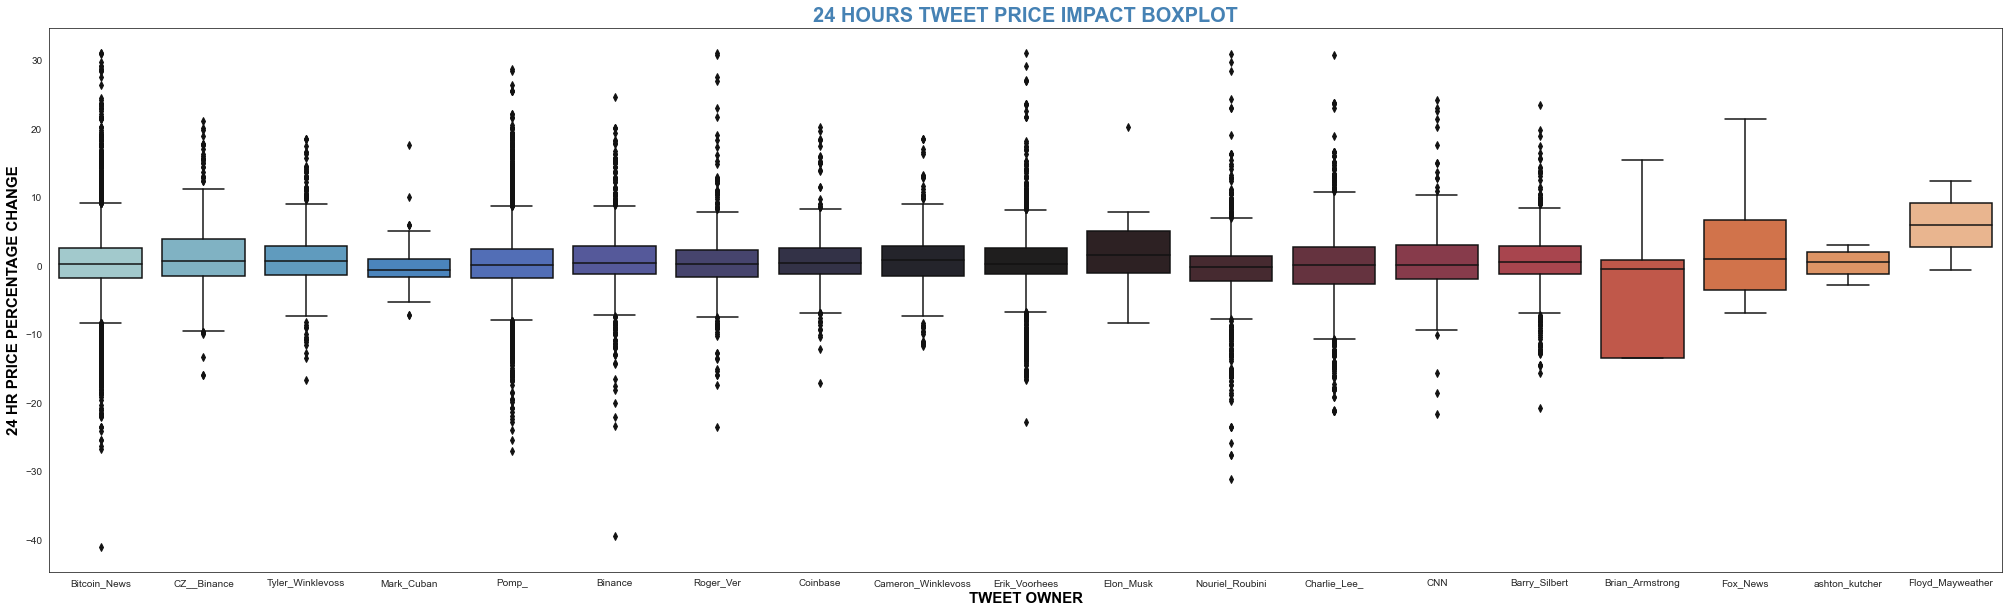

In [26]:
sns.set_style(style="white")
plt.figure(figsize = (35,10))
plt.title('24 HOURS TWEET PRICE IMPACT BOXPLOT',
             fontdict = {'fontsize':20,'fontweight':'bold','color':'steelblue'})
ax = sns.boxplot(x="name", y="24hr_change", data=merge_df,palette="icefire")
plt.xlabel('TWEET OWNER',
          fontdict = {'fontsize':15,'fontweight':'bold','color':'black'})
plt.ylabel('24 HR PRICE PERCENTAGE CHANGE',
          fontdict = {'fontsize':15,'fontweight':'bold','color':'black'})
ax.figure.savefig("./images/boxplot.png")
plt.show()

Below is an interactive function that displays the individual tweet and it's price impact from the people stated above. (I did not make an individual interactive function for every individual because it would take too much space. Change the name of the person if needed.) After analyzing their tweets, it was noticed that there were times when Elon Musk and Mark Cuban wrote a positive tweet regarding cryptocurrency, the price went up drastically.It is really difficult to state that those price changes were caused by the actual tweets, because there were instances where comments were made, but there were no significant changes.

Other sources, such as Brian Armstrong and Fox News, only tweeted commenting on big  crypto related events that occurred that day. It can be stated that the price fluctuations were caused by other sources, such as government intervention and corruption scandals. 

In [27]:
@interact
def big_boys_tweet(i=(0,len(merge_df[merge_df['name'] == "Elon_Musk"].copy())-1)):
    df = merge_df[merge_df['name']=="Elon_Musk"]
    df.reset_index(inplace=True)
    percentage = round(df['24hr_change'][i],1)
    print('Date:',df['Date'][i],end='\n\n')
    print('Tweet:',df['tweet'][i],end='\n\n')
    print('Tweet Owner:',df['name'][i],end='\n\n')
    print('Price percentage change 24 hours after tweet:',f'{percentage}%', end = '\n\n')

interactive(children=(IntSlider(value=14, description='i', max=28), Output()), _dom_classes=('widget-interact'…

Below is another set of interactive functions that display all the tweets that were linked to a big positive or negative price change.

In [28]:
@interact
def impactful_tweet(i=(0,len(merge_df[merge_df['24hr_change']>5].copy())-1)):
    df = merge_df[merge_df['24hr_change']>5]
    df.reset_index(inplace=True)
    percentage = round(df['24hr_change'][i],1)
    print('Date:',df['Date'][i],end='\n\n')
    print('Tweet:',df['tweet'][i],end='\n\n')
    print('Tweet Owner:',df['name'][i],end='\n\n')
    print('Price percentage change 24 hours after tweet:',f'{percentage}%', end = '\n\n')


interactive(children=(IntSlider(value=1886, description='i', max=3773), Output()), _dom_classes=('widget-inter…

In [29]:
@interact
def negative_tweet(i=(0,len(merge_df[merge_df['24hr_change']<-5])-1)):
    df = merge_df[merge_df['24hr_change']<-5]
    df.reset_index(inplace=True)
    percentage = round(df['24hr_change'][i],1)
    print('Date:',df['Date'][i],end='\n\n')
    print('Tweet:',df['tweet'][i],end='\n\n')
    print('Tweet Owner:',df['name'][i],end='\n\n')
    print('Price percentage change 24 hours after tweet:',f'{percentage}%', end = '\n\n')

interactive(children=(IntSlider(value=1407, description='i', max=2815), Output()), _dom_classes=('widget-inter…

It does not matter if the price went up or down, positive and negative remarks were made by different sources,regardless of the direction of price deviation. At first glance, there doesn't seem to be any obvious correlations between the price deviation and tweet comments. 

Lets take a look at the 10 most used words used by each source to see if any meaning that be extracted from them.

In [30]:
@interact
def most_used_words(i=(1,18)):
    sns.set_style(style="whitegrid")
    name_list = list(merge_df['name'].unique())
    from collections import Counter
    common_df = merge_df[merge_df['name']==name_list[i]]
    common_corpus = common_df['tweet'].to_list()
    common_tokens = word_tokenize(','.join(common_corpus))
    common_stopped_tokens = [w.lower() for w in common_tokens if w.lower() not in stopwords_list]
    Counter = Counter(common_stopped_tokens)
    word_dict = {}
    
    for t in Counter.most_common(10):
        word_dict[t[0]] = t[1]

    plt.figure(figsize = (13,7))
    plt.title(f'10 MOST COMMON WORDS TWEETED BY {name_list[i].upper()}',
             fontdict = {'fontsize':20,'fontweight':'bold','color':'steelblue'})
    plt.xlabel('FREQUENCY',
              fontdict = {'fontsize':15,'fontweight':'bold','color':'black'})
    plt.ylabel('WORD',
              fontdict = {'fontsize':15,'fontweight':'bold','color':'black'})
    ax = sns.barplot(x=list(word_dict.keys()), y=[float(x) for x in word_dict.values()],
                    palette="icefire")


interactive(children=(IntSlider(value=9, description='i', max=18, min=1), Output()), _dom_classes=('widget-int…

By looking at the 10 most frequent words by each source, their overall stance regarding Bitcoin can be determined.

* CZ Binance: In Favor
* Tyler Winklevoss: In Favor
* Mark Cuban: In Favor
* Pomp : In Favor
* Binance: In Favor
* Roger Ver: No clear stance
* Coinbase: In Favor
* Cameron Winklevoss: In Favor
* Erik Vooghees: Against
* Elon Musk: In Favor
* Nouriel_Roubini: Against
* Charlie Lee: In Favor
* CNN: No clear stance
* Barry Silbert: In Favor
* Brian Armstrong: No clear stance
* Fox News: No clear stance
* Ashton Kutcher: In Favor
* Floyd Mayweather: In Favor

Below is a HeatMap that shows the correlation between price variation and other features in the data frame. Price change percentage will be compared with the number of likes, retweets,and replies count. The assumption is that if the tweet had a bigger exposure, meaning received more likes, replies, and retweets, the impact would also be greater, either positively or negatively.

The HeatMap shows that nothing has a significant correlation with price. That might be because the those features influence the price change percentage both ways, negative and positive.

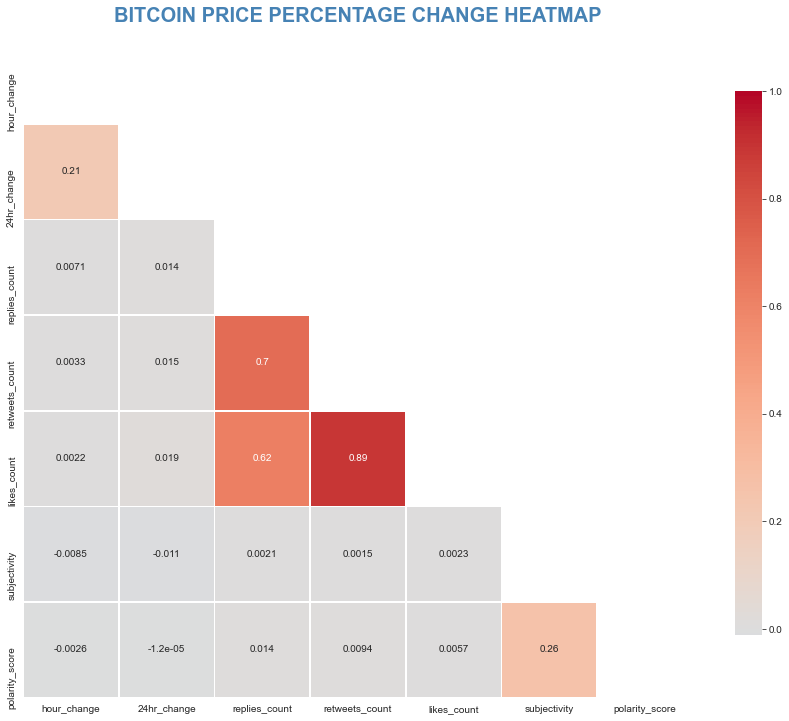

In [31]:
sns.set_style(style="white")
columns = ['hour_change', '24hr_change','replies_count',
           'retweets_count', 'likes_count','subjectivity',
           'polarity_score']
heat = merge_df[columns]

#CORRELATION HEATMAP
corr = heat.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

plt.title('BITCOIN PRICE PERCENTAGE CHANGE HEATMAP',
             fontdict = {'fontsize':20,'fontweight':'bold','color':'steelblue'})

plt.show()

The values in the 24hr price change column will be changed to either **Neutral** or **Impactful**. These will be the categories for the ML models that will be made.
A percent change greater than 5% and smaller than -5% will be considered impactful. Any value that lies between the two will be considered neutral. I don't want to do a negative or positive categorical model because I am not interested in knowing if a person's comment is going to make the value of the currency go up or down, I am interested in identifying people or comments that have a big impact in the currency.

In [32]:
for i in range(0,len(merge_df)):
    
       
    if (merge_df['24hr_change'][i] <-5) or (merge_df['24hr_change'][i] > 5):
        merge_df['24hr_change'][i] = None
        merge_df.fillna('Impactful',inplace=True)
    else:
        merge_df['24hr_change'][i] = None
        merge_df.fillna('Neutral',inplace=True)

        
merge_df

,Date,hour_change,24hr_change,tweet,name,replies_count,retweets_count,likes_count,stem_tweet,tweet_length,subjectivity,polarity,polarity_score
0,2021-03-05 23:00:00,-0.669302,Neutral,The St. Petersburg City Court accepted the ple...,Bitcoin_News,13.0,17.0,33.0,st. petersburg citi court accept plea three cr...,18.0,0.700000,Positive,0.200000
1,2021-03-05 23:00:00,-0.669302,Neutral,"The new Nasdaq-listed company ""will be establi...",Bitcoin_News,21.0,64.0,190.0,nasdaq-list compani establish industrial-scal ...,13.0,0.000000,Neutral,0.000000
2,2021-03-05 22:00:00,0.078796,Neutral,The NFT monetization model for content platfor...,CZ__Binance,3.0,177.0,1115.0,nft monet model content platform pioneer much ...,25.0,0.355556,Positive,0.344444
3,2021-03-05 21:00:00,-0.335639,Neutral,Taraxa Wants to Put Every Informal Transaction...,Bitcoin_News,10.0,10.0,32.0,taraxa want put everi inform transact record u...,11.0,0.000000,Positive,0.000000
4,2021-03-05 21:00:00,-0.335639,Neutral,John McAfee Indicted by DOJ Over Alleged Crypt...,Bitcoin_News,13.0,25.0,62.0,john mcafe indict doj alleg fraud charg,8.0,0.000000,Negative,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29430,2015-10-08 18:00:00,-0.404098,Neutral,"Over the past six months, Bitcoin is down a me...",Erik_Voorhees,3.0,29.0,21.0,past six month mere 0.4 vs p500 3.5 magic inte...,17.0,0.515625,Neutral,-0.046875
29431,2015-10-08 18:00:00,-0.404098,Neutral,FoldApp would be an alternative to the Starbuc...,Erik_Voorhees,0.0,0.0,1.0,foldapp altern starbuck former save 20 take choic,11.0,0.000000,Positive,0.000000
29432,2015-10-08 18:00:00,-0.404098,Neutral,Bitcoin is way too volatile/noisy/small to be ...,Erik_Voorhees,2.0,0.0,2.0,way volatile/noisy/smal use measur usd inflat ...,10.0,0.000000,Neutral,0.000000
29433,2015-10-08 17:00:00,0.302968,Neutral,My dad was a professor of actuarial science at...,Tyler_Winklevoss,3.0,11.0,18.0,dad professor actuari scienc wharton obviou futur,8.0,0.000000,Neutral,0.000000


In [33]:
# NEUTRAL VS IMPACTFUL DISTRIBUTION
merge_df['24hr_change'].value_counts(normalize=True)

Neutral      0.776117
Impactful    0.223883
Name: 24hr_change, dtype: float64

### Word Cloud

In [34]:
def word_cloud(corpus,stopwords_list,name):
    #TOKENIZING TEXT
    tokens = word_tokenize(','.join(corpus))

    twitter_logo = np.array(Image.open('./images/twitter_logo.png'))

    wordcloud = WordCloud(stopwords=stopwords_list,
                          collocations=False,
                         background_color = 'white',
                         mask=twitter_logo,
                          contour_width=5,
                          contour_color='dodgerblue')

    #GENERATE WORD CLOUD
    wordcloud.generate(','.join(tokens))

    #STORE TO FILE
    wordcloud.to_file(f'./images/bitcoin{name}.png')

    #CREATE COLORING FROM IMAGE
    image_colors = ImageColorGenerator(twitter_logo)


    #PLOTTING
    plt.figure(figsize = (12, 12), facecolor = None) 
    ax = plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.title(f'{name} BITCOIN WORDCLOUD',fontdict = {'fontsize':25,'fontweight':'bold','color':'dodgerblue'})

    ax.figure.savefig(f'./images/{name}_wc.png')
    plt.show()
    

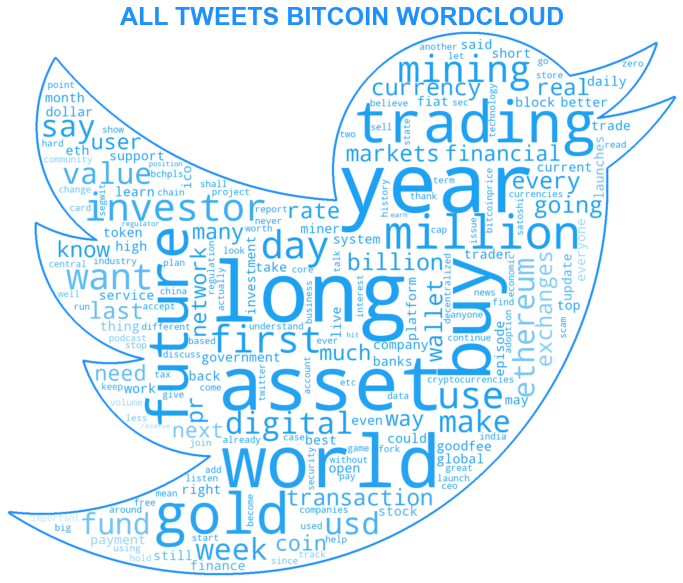

In [35]:
corpus = merge_df['tweet'].str.lower().to_list()
word_cloud(corpus,stopwords_list,'ALL TWEETS')

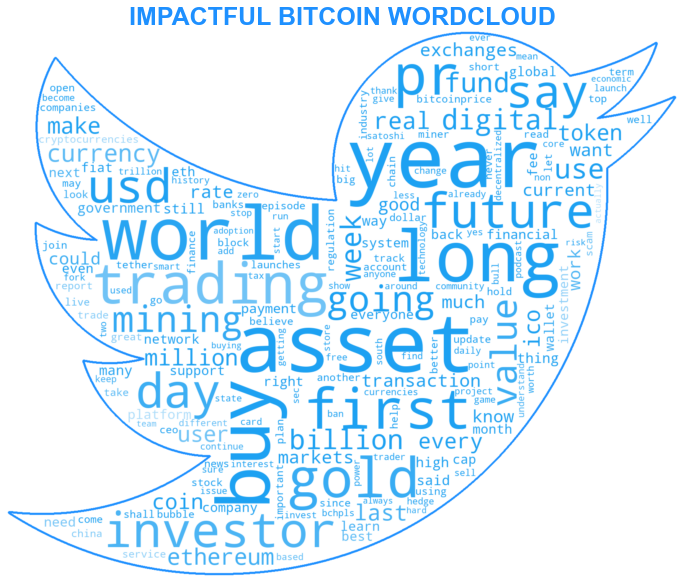

In [36]:
#CREATING CORPUS WITH ONLY IMPACTFUL TWEETS
df_imp = merge_df[merge_df['24hr_change'] == 'Impactful']
corpus = df_imp['tweet'].str.lower().to_list()
word_cloud(corpus,stopwords_list,'IMPACTFUL')

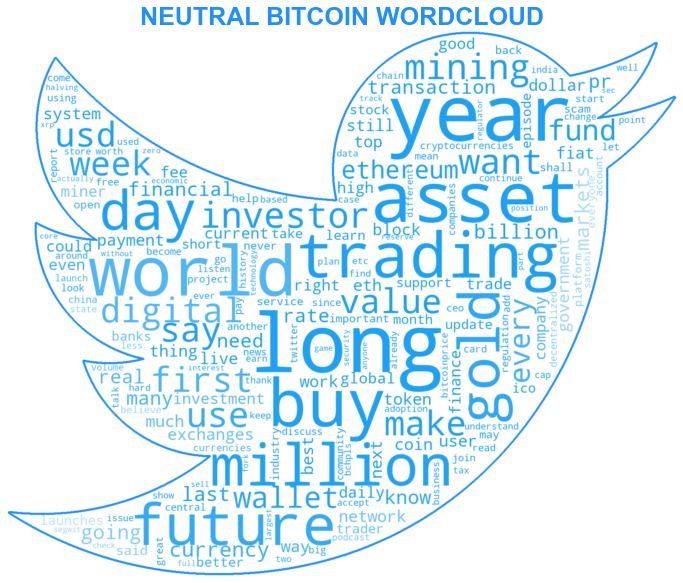

In [37]:
#CREATING CORPUS WITH ONLY IMPACTFUL TWEETS
df_neu = merge_df[merge_df['24hr_change'] == 'Neutral']
corpus = df_neu['tweet'].str.lower().to_list()
word_cloud(corpus,stopwords_list,'NEUTRAL')

There is no clear distinction between impactful and neutral word clouds. It doesn't seem to matter if there is a big change in Bitcoin price, the sentiment around it remains the same. 

# MODEL

## Creating Function to Evaluate Random Forest Model

In [38]:
#CREATING FUNCTION TO EVALUATE MODELS

def model_eval(model,X_train,y_train,X_test,y_test,classes=None,
                           normalize='true',cmap='Blues',label=''):

#         """Function with PEP 484 type annotations.

#         Args:
#             model: The Model Classifier.
#             X_train: X_train being used to fit model (could be scaled or not).
#             y_train: y_train being used to fit model and to get train accuracy.
#             X_test: X_test to get test predictions.
#             y_test: y_test used to get test accuracy
#             classes: Class labels
#             normalize: set to true
#             cmap: Color scheme for Confusion Matrix. Set to Blues
#             label: Confusion Matrix Label

#         Returns:
#             Model Accuracy. Confusion Matrix, ROC Curve, and best params for GridSearch

#         """
    
    
    #FITTING MODEL WITH TRAIN DATA
    model.fit(X_train,y_train)   
      
    #GETTING TRAIN PREDICTIONS
    y_hat_train = model.predict(X_train)
    
    #GETING TEST PREDICTIONS
    y_hat_test = model.predict(X_test)
    
    dashes = '---'*20
    
    if isinstance(model,GridSearchCV):
        grid_header = "GRID SEARCH FOUND THE FOLLOWING OPTIMAL PARAMETERS: "
        print(dashes,grid_header,dashes,sep='\n')
        best_parameters = model.best_params_
        for param_name in sorted(best_parameters.keys()):
            print("%s: %r" % (param_name, best_parameters[param_name]))
    
    #GETTING ACCURACY SCORE FOR TRAIN AND TEST
    
    if len(label)>0:
        accuracy_header = f'{label} ACCURACY'
    else:
        accuracy_header = 'MODEL ACCURACY'
    print(dashes,accuracy_header,dashes,sep='\n')
    training_accuracy = accuracy_score(y_train, y_hat_train)
    testing_accuracy = accuracy_score(y_test, y_hat_test)
    
    print(f'TRAINING ACCURACY: {round(training_accuracy*100,2)}%')
    print(f'TESTING ACCURACY: {round(testing_accuracy*100,2)}%')
          
    #CLASSIFICATION REPORT AND SCORES
    test_header = "CLASSIFICATION REPORT"
    
    #ADDING LABEL IF GIVEN
    if len(label)>0:
        test_header += f" USING {label}"
    
    # PRINT CLASSIFICATION REPORT
    
    print(dashes,test_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))

    print(dashes+"\n\n")
    
    

    # MAKE FIGURE
    fig, axes = plt.subplots(figsize=(6,6),ncols=1)
   

    # PLOTTING CONFUSION MATRIX 
    if isinstance(model,GridSearchCV):
        metrics.plot_confusion_matrix(model.best_estimator_, X_test,y_test,
                                      display_labels=classes,
                                      normalize=normalize,
                                     cmap=cmap,ax=axes,xticks_rotation=45)
        axes.set(title='Confusion Matrix')
    else:
        metrics.plot_confusion_matrix(model, X_test,y_test,
                                      display_labels=classes,
                                      normalize=normalize,
                                     cmap=cmap,ax=axes,xticks_rotation=45)
        axes.set(title='Confusion Matrix')
    
    fig.tight_layout()
    plt.show()   

## Random Forest Model Using Engineered Columns

In this section, a Random Forest will be made only using the engineered and integer columns. No text will be directly analyzed like a NLP model.

Weights will be made for each tweet source. A source that makes frequent posts about Bitcoin will have a lower weight, and sources that rarely makes any comments will have a bigger weight. 

In [39]:
#CREATING CLASS WEIGHTS TO BE USED IN  MODEL
weights_names = compute_class_weight('balanced',np.unique(merge_df['name']),merge_df['name'])

weights_names_dict = dict(zip(np.unique(merge_df['name']),weights_names))
weights_names_dict

merge_df['name_weight'] = merge_df['name'].map(lambda x: weights_names_dict[x])

In [40]:
y = merge_df['24hr_change'].copy()
X_columns = ['name','polarity']
X=merge_df[X_columns].copy()
X = pd.get_dummies(X)
X = pd.concat([X,merge_df['subjectivity']],axis=1)
X = pd.concat([X,merge_df['name_weight']],axis=1)
X = pd.concat([X,merge_df['replies_count']],axis=1)
X = pd.concat([X,merge_df['retweets_count']],axis=1)
X = pd.concat([X,merge_df['likes_count']],axis=1)
X = pd.concat([X,merge_df['tweet_length']],axis=1)

X

,name_Barry_Silbert,name_Binance,name_Bitcoin_News,name_Brian_Armstrong,name_CNN,name_CZ__Binance,name_Cameron_Winklevoss,name_Charlie_Lee_,name_Coinbase,name_Elon_Musk,...,name_ashton_kutcher,polarity_Negative,polarity_Neutral,polarity_Positive,subjectivity,name_weight,replies_count,retweets_count,likes_count,tweet_length
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0.700000,0.131067,13.0,17.0,33.0,18.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0.000000,0.131067,21.0,64.0,190.0,13.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0.355556,2.791370,3.0,177.0,1115.0,25.0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0.000000,0.131067,10.0,10.0,32.0,11.0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0.000000,0.131067,13.0,25.0,62.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29430,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0.515625,0.527301,3.0,29.0,21.0,17.0
29431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0.000000,0.527301,0.0,0.0,1.0,11.0
29432,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0.000000,0.527301,2.0,0.0,2.0,10.0
29433,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0.000000,1.766489,3.0,11.0,18.0,8.0


In [41]:
y.value_counts(True)

Neutral      0.776117
Impactful    0.223883
Name: 24hr_change, dtype: float64

In [42]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,
                                                    random_state=69)

In [43]:
# CHECKING Y_TRAIN AND Y_TEST VALUE COUNTS TO SEE IF IT MATCHES THE DF DISTRIBUTION

print(f'y_train value counts: \n {y_train.value_counts(normalize = True)}')
print('\n')
print(f'y_test value counts: \n {y_test.value_counts(normalize = True)}')

y_train value counts: 
 Neutral      0.775886
Impactful    0.224114
Name: 24hr_change, dtype: float64


y_test value counts: 
 Neutral      0.778193
Impactful    0.221807
Name: 24hr_change, dtype: float64


In [44]:
#INITIALIZING CLASSIFIER
rf = RandomForestClassifier(class_weight='balanced',
                            max_depth=8,
                            n_estimators=100)

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TRAINING ACCURACY: 64.59%
TESTING ACCURACY: 59.34%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

   Impactful       0.26      0.46      0.33       653
     Neutral       0.80      0.63      0.71      2291

    accuracy                           0.59      2944
   macro avg       0.53      0.54      0.52      2944
weighted avg       0.68      0.59      0.62      2944

------------------------------------------------------------




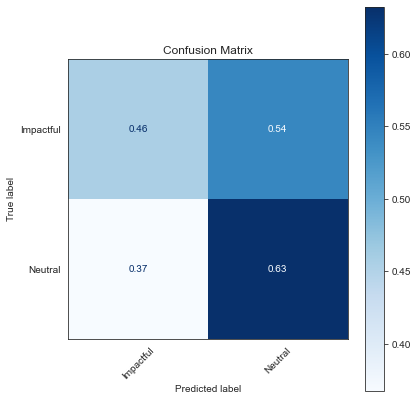

In [45]:
#EVALUATING MODEL USING FUNCTION
model_eval(rf,X_train,y_train,X_test,y_test)

The random forest model with just the engineered columns did not perform too well. It only correctly classified 67% of the Neutral tweets and 41% of the impactful tweets. Since there is a significant class imbalance, most of the models predictions are falling into the neutral categories.

## Naive Bayes Model Using only Tweet Texts

Below, a Naive Bayes model will only analyze the text content of the tweets and where it came from. In some cases, Naive Bayes models perform better in binary text classification tasks.

**ComplementNB** implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. Specifically, CNB uses statistics from the complement of each class to compute the model’s weights. The inventors of CNB show empirically that the parameter estimates for CNB are more stable than those for MNB. Further, CNB regularly outperforms MNB (often by a considerable margin) on text classification tasks. 

**<font size = 1> Complement Naive Bayes description taken from Scikit learn documentation.</font>**

In [46]:
y = merge_df['24hr_change'].copy()
X = merge_df['name'] + ' ' + merge_df['stem_tweet'].copy()

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,
                                                 random_state=69)

In [48]:
#MAKE TFIDFVECTORIZER USING STOPWORDS_LIST
vectorizer = TfidfVectorizer(tokenizer = word_tokenize,stop_words=stopwords_list)

# VECTORIZE DATA AND MAKE X_train_tfidf and X_test_tfidf
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf

<26491x19069 sparse matrix of type '<class 'numpy.float64'>'
	with 265561 stored elements in Compressed Sparse Row format>

In [49]:
#CHECKING LENGTH OF VECTORIZER VOCABULARY
print (len(vectorizer.vocabulary_))

19069


In [50]:
#INITIALIZING CLASSIFIER
NB = ComplementNB()

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TRAINING ACCURACY: 81.33%
TESTING ACCURACY: 74.8%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

   Impactful       0.30      0.11      0.16       653
     Neutral       0.79      0.93      0.85      2291

    accuracy                           0.75      2944
   macro avg       0.54      0.52      0.50      2944
weighted avg       0.68      0.75      0.70      2944

------------------------------------------------------------




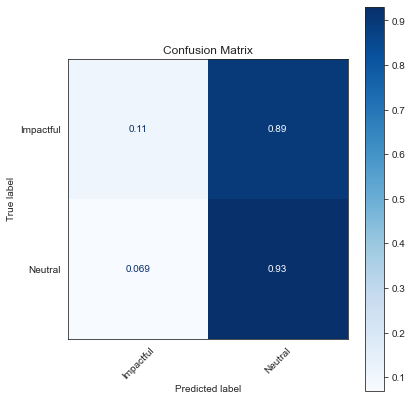

In [51]:
#EVALUATING MODEL USING FUNCTION
model_eval(NB,X_train_tfidf,y_train,X_test_tfidf,y_test)

Naive Bayes classifier performed considerably worse than the Random Forest model. The testing and training accuracies might be higher, but that's because it's labeling almost every tweet as Neutral. Due to the class imbalance (77%/22%), if the model labeled everything as Neutral, it would have an accuracy of 77%, but what this project is really concerned about is finding the impactful tweets.

## Random Forest Model Using only Tweet Texts

Since the last Random Forest model performed slightly better than the Naive Bayes, the Random Forest classifier will now be used to analyze only the text data.

------------------------------------------------------------
MODEL ACCURACY
------------------------------------------------------------
TRAINING ACCURACY: 60.22%
TESTING ACCURACY: 54.93%
------------------------------------------------------------
CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

   Impactful       0.25      0.54      0.35       653
     Neutral       0.81      0.55      0.66      2291

    accuracy                           0.55      2944
   macro avg       0.53      0.54      0.50      2944
weighted avg       0.68      0.55      0.59      2944

------------------------------------------------------------




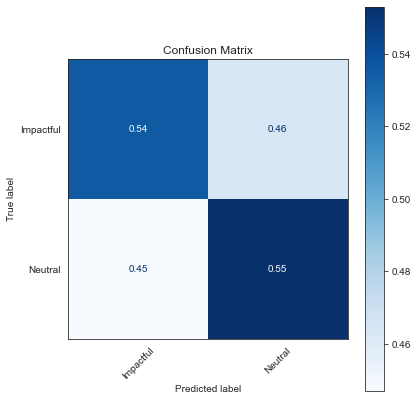

In [52]:
model_eval(rf,X_train_tfidf,y_train,X_test_tfidf,y_test)

The text only Random Forest model performed very similarly to the Engineered Columns Random Forest model. Both models have difficulties detecting the what makes the impactful category unique.

Below are the 30 most important words that the model used to classify the tweets. It's not known how each of those words impacted the models decision, for example, Charlie Lee seemed to be very important to the models decision making, but it's not known for which class.

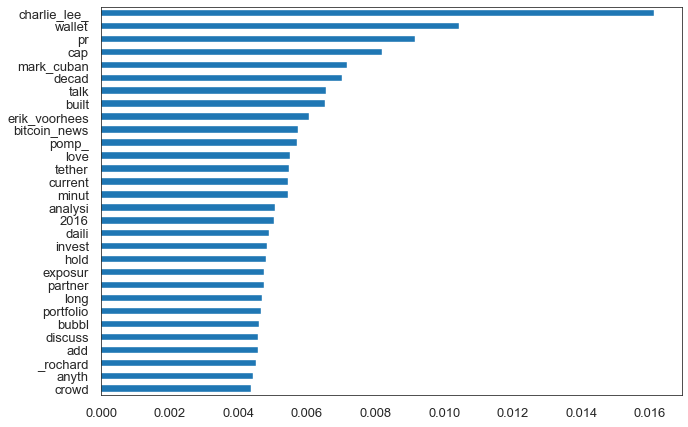

In [53]:
# PLOTTING 30 MOST IMPORTANT FEATURES
with plt.style.context('seaborn-talk'):

    #GETTING FEATURE IMPORTANCE
    importance = pd.Series(rf.feature_importances_,index=vectorizer.get_feature_names())

    # SORTING VALUES AND CREATING A BAR CHART WITH 30 MOST IMPORTANT
    importance.sort_values().tail(30).plot(kind='barh')

### Using LIME Text Explainer

**LIME Text Explainer** will be used to demonstrate which words were meaningful to the model and how they impacted its decision.

In [54]:
#CREATING A PIPELINE TO GET PROBABILITIES
c = make_pipeline(vectorizer, rf)

In [55]:
@interact

def Lime(i=(0,len(X_test)-1)):
    # INITIALIZING LIME
    class_names = ['NEUTRAL', 'IMPACTFUL']
    explainer = LimeTextExplainer(class_names=class_names)
    if X_test.iloc[i] != 'blank':
        exp = explainer.explain_instance(X_test.iloc[i], c.predict_proba)

        fig = exp.as_pyplot_figure()
        exp.show_in_notebook()

interactive(children=(IntSlider(value=1471, description='i', max=2943), Output()), _dom_classes=('widget-inter…

It can be seen how the model is having difficulties classifying the text. Most tweets have a 50/50 chance of being in either class.

## Deep NLP using Tweet Texts

Now, a Recurrent Neural Network will be used to analyze the tweets. By using word embeddings, the model will be able to learn the meaning of the words used in the tweets. This more complex approach should be able to identify the subtle differences between the comments.

<font size = 3> **RECURRING NEURAL NETWORKS**</font>
- **Recurrent Neural Networks** are used to evaluate Sequences of data, rather than just individual data points. All text data is sequence data by default; a letter only makes sense when it's words are in the proper order. RNNs excel at NLP tasks, because they can take in text as full sequences of words, from a single sentence up to an entire document or book! Because of this, they do not suffer the same loss of information that comes from a traditional Bag-of-Words vectorization approach.

![graph2](./images/unrolled.gif)

<font size = 3> **WORD EMBEDDINGS**</font>

- **Word Embeddings** are a type of vectorization strategy that computes word vectors from a text corpus by training a neural network, which results in a high-dimensional embedding space, where each word in the corpus is a unique vector in that space. In this embedding space, the position of the vector relative to the other vectors captures semantic meaning. RNN can use word embeddings by creating an empty embedding layer at the beginning of the sequential model, by using a pre-trained **Word 2 Vec** word embedding from your own dataset, or by using **GloVe**, which is a pre-trained word embedding from a large data bank, such as Wikipedia.
![graph3](./images/embeddings.png)

 <font size = 1> **Information taken from Flatiron School DEEP NLP Section.**</font>

### Deep NLP Evaluation Function

In [56]:
#CREATING MODEL EVALUATION FUNCTION FOR DEEP NLP

def model_eval_2(y_test,y_hat_test, normalize='true',cmap='Blues',label='MODEL',
                           title='Confusion matrix',classes= [0,1,2]):

#         """Function with PEP 484 type annotations.

#         Args:
#             model: The Model Classifier.
#             X_train: X_train being used to fit model (could be scaled or not).
#             y_train: y_train being used to fit model and to get train accuracy.
#             X_test: X_test to get test predictions.
#             y_test: y_test used to get test accuracy
#             classes: Class labels
#             normalize: set to true
#             cmap: Color scheme for Confusion Matrix. Set to Blues
#             label: Confusion Matrix Label

#         Returns:
#             Model Accuracy. Confusion Matrix, ROC Curve, and best params for GridSearch

#         """
    
    dashes = '---'*20

    #GETTING ACCURACY SCORE FOR TRAIN AND TEST    
    accuracy_header = f'{label} ACCURACY'
    print(dashes,accuracy_header,dashes,sep='\n')
    testing_accuracy = accuracy_score(y_test, y_hat_test)

    print(f'TESTING ACCURACY: {round(testing_accuracy*100,2)}%')


    #CLASSIFICATION REPORT AND SCORES
    test_header = f"{label} CLASSIFICATION REPORT"


    # PRINT CLASSIFICATION REPORT    
    print(dashes,test_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))

    print(dashes+"\n\n")


    # MAKE FIGURE
    fig, axes = plt.subplots(figsize=(15,5),ncols=3)      


    # PLOTTING CONFUSION MATRIX 

    cm = confusion_matrix(y_true=y_test, y_pred=y_hat_test,normalize=normalize)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(ax=axes[2])
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],2),
            horizontalalignment="center",
            color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #PLOTTING  LOSS VS. VAL_LOSS AND ACCURACY VS. VAL_ACCURACY
    history_df = pd.DataFrame(history.history)

    loss_df = history_df[[col for col in history_df.columns if 'loss' in col]]
    loss_df = loss_df.reset_index()

    acc_df = history_df[[col for col in history_df.columns if 'acc' in col]]
    acc_df = acc_df.reset_index()

    sns.lineplot(x='index',y='val_loss',data=loss_df,marker='o',ax=axes[0],label='val_loss')
    sns.lineplot(x='index',y='loss',data=loss_df,marker='o',ax=axes[0],label='train_loss')
    axes[0].set_title('Training Loss vs. Validation Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc="upper right")

    sns.lineplot(x='index',y='val_accuracy',data=acc_df,marker='o',ax=axes[1],label= 'val_accuracy')
    sns.lineplot(x='index',y='accuracy',data=acc_df,marker='o',ax=axes[1],label= 'train_accuracy')
    axes[1].set_title('Training Accuracy vs. Validation Accuracy')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[0].legend(loc="upper right")

    fig.tight_layout()
    plt.show()



### Model

In [57]:
merge_df

,Date,hour_change,24hr_change,tweet,name,replies_count,retweets_count,likes_count,stem_tweet,tweet_length,subjectivity,polarity,polarity_score,name_weight
0,2021-03-05 23:00:00,-0.669302,Neutral,The St. Petersburg City Court accepted the ple...,Bitcoin_News,13.0,17.0,33.0,st. petersburg citi court accept plea three cr...,18.0,0.700000,Positive,0.200000,0.131067
1,2021-03-05 23:00:00,-0.669302,Neutral,"The new Nasdaq-listed company ""will be establi...",Bitcoin_News,21.0,64.0,190.0,nasdaq-list compani establish industrial-scal ...,13.0,0.000000,Neutral,0.000000,0.131067
2,2021-03-05 22:00:00,0.078796,Neutral,The NFT monetization model for content platfor...,CZ__Binance,3.0,177.0,1115.0,nft monet model content platform pioneer much ...,25.0,0.355556,Positive,0.344444,2.791370
3,2021-03-05 21:00:00,-0.335639,Neutral,Taraxa Wants to Put Every Informal Transaction...,Bitcoin_News,10.0,10.0,32.0,taraxa want put everi inform transact record u...,11.0,0.000000,Positive,0.000000,0.131067
4,2021-03-05 21:00:00,-0.335639,Neutral,John McAfee Indicted by DOJ Over Alleged Crypt...,Bitcoin_News,13.0,25.0,62.0,john mcafe indict doj alleg fraud charg,8.0,0.000000,Negative,0.000000,0.131067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29430,2015-10-08 18:00:00,-0.404098,Neutral,"Over the past six months, Bitcoin is down a me...",Erik_Voorhees,3.0,29.0,21.0,past six month mere 0.4 vs p500 3.5 magic inte...,17.0,0.515625,Neutral,-0.046875,0.527301
29431,2015-10-08 18:00:00,-0.404098,Neutral,FoldApp would be an alternative to the Starbuc...,Erik_Voorhees,0.0,0.0,1.0,foldapp altern starbuck former save 20 take choic,11.0,0.000000,Positive,0.000000,0.527301
29432,2015-10-08 18:00:00,-0.404098,Neutral,Bitcoin is way too volatile/noisy/small to be ...,Erik_Voorhees,2.0,0.0,2.0,way volatile/noisy/smal use measur usd inflat ...,10.0,0.000000,Neutral,0.000000,0.527301
29433,2015-10-08 17:00:00,0.302968,Neutral,My dad was a professor of actuarial science at...,Tyler_Winklevoss,3.0,11.0,18.0,dad professor actuari scienc wharton obviou futur,8.0,0.000000,Neutral,0.000000,1.766489


In [58]:
y = merge_df['24hr_change'].replace({'Neutral':0,
                          'Impactful':1})
X = merge_df['name'] + ' ' +merge_df['tweet'].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,
                                                 random_state=69)

In [59]:
#CREATING CLASS WEIGHTS TO BE USED IN DEEP NLP MODEL
weights = compute_class_weight('balanced',np.unique(y_train),y_train)

weights_dict = dict(zip(np.unique(y_train),weights))
weights_dict

{0: 0.6444244429308164, 1: 2.2310089270675424}

In [60]:
#ONE HOT ENCODE
y_train_seq=to_categorical(y_train)
y_test_seq=to_categorical(y_test)

print(f'y_train shape: {y_train_seq.shape}')
y_test_seq

y_train shape: (26491, 2)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [61]:
#TOKENIZE TEXT
MAX_WORDS=20000
tokenizer = text.Tokenizer(num_words = MAX_WORDS)
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

#FIND LONGEST SEQUENCE
MAX_SEQUENCE_LENGTH= max(list(map(lambda x:len(x),[*train_sequences,*test_sequences])))
MAX_SEQUENCE_LENGTH

68

In [62]:
X_train_seq = sequence.pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH)
X_test_seq = sequence.pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH)

X_train_seq

array([[   0,    0,    0, ...,  654,    1,  187],
       [   0,    0,    0, ...,   86,    8,  936],
       [   0,    0,    0, ...,    1, 3251, 3101],
       ...,
       [   0,    0,    0, ...,   34,  175,  196],
       [   0,    0,    0, ...,   15,   48,  210],
       [   0,    0,    0, ...,    1,    7,  130]])

In [63]:
len(tokenizer.index_word)

23612

In [64]:
#GOT FROM JAMES IRVING
def get_earlystop(monitor='val_loss',patience=4, restore_best_weights=True):
    """"""""
    args = locals()
    return EarlyStopping(**args)

In [65]:
def make_model(EMBEDDING_SIZE=68):
    model=Sequential()
    
    model.add(Embedding(MAX_WORDS,EMBEDDING_SIZE))    
    model.add(LSTM(32,return_sequences=False,recurrent_dropout=0.5))
    model.add(Dropout(0.5))
    model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(),
                    kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    

    model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    display(model.summary())
    
    return model

model = make_model()

history = model.fit(X_train_seq, y_train_seq, epochs=20,batch_size=32, 
                    validation_split = 0.1, callbacks=get_earlystop(),
                   class_weight=weights_dict,
                    workers=3)

y_hat_test = model.predict(X_test_seq).argmax(axis=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 68)          1360000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                12928     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 1,373,490
Trainable params: 1,373,490
Non-trainable params: 0
______________________________________________

None

Epoch 1/20
746/746 [==============================] - 51s 68ms/step - loss: 0.6985 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5072
Epoch 2/20
746/746 [==============================] - 50s 67ms/step - loss: 0.6569 - accuracy: 0.5928 - val_loss: 0.6787 - val_accuracy: 0.5645
Epoch 3/20
746/746 [==============================] - 55s 74ms/step - loss: 0.5506 - accuracy: 0.7300 - val_loss: 0.7925 - val_accuracy: 0.5174
Epoch 4/20
377/746 [==============>...............] - ETA: 25s - loss: 0.4180 - accuracy: 0.8125

KeyboardInterrupt: 

In [ ]:
model_eval_2(y_test,y_hat_test,classes=['Neutral','Impactful'],
             label= 'REGULAR EMBEDDING MODEL')

The Recurrent Neural Network was not able to understand the complexity of the task. It can be seen after the 3rd epoch that the model stopped improving. The model achieved a testing accuracy of 59.95%.

# CONCLUSION & FUTURE WORK

## Conclusion

As stated at the beginning of the notebook, the goals of this project were:

1. Successfully scrappe archived tweets.
2. Determine if influential and powerful individuals do actually have an impact of the price of Bitcoin by analyzing their Twitter comments.
- Determine the best method to analyze and model tweets.

Only 1 goal, to successfully scrappe archived tweets, was achieved successfully. They will be explained more in depth below.

1. **Successfully scrappe archived tweets.**

    At first, the Tweepy Python library was used to collect the tweets used in this project. The library had several limitations:
    - Needing an access to Twitter's API. The approval process can take weeks, depending on what the user wants to do.
    - Not being able to do Advanced Searches.
    - Tweets limitation. Only last 3,200 tweets can be extracted.
    - Needing to pay to get archived tweets.
    
   Thankfully I found the Twint python library. With only 6 lines of code, I was able to collect 33,962 tweets, dating back to 2008, from multiple users. Some of the benefits of using Twint vs Twitter API:

    - Can fetch almost all Tweets (Twitter API limits to last 3200 Tweets only).
    - Fast initial setup.
    - Can be used anonymously and without Twitter sign up.
    - No rate limitations.
    <br><br>
2. **Determine if influential and powerful individuals do actually have a deep influence in the price of Bitcoin by analyzing their Twitter comments.**
    
    After a thorough analysis of the tweets, it could not be affirmed with confidence that influential and powerful individuals have a deep influence in the price of Bitcoin. The examples presented in the introduction must have been independent events, and after a few days the price corrected itself. Also, there were days where multiple people posted comments with different sentiments, even though on one of the models the sources were weighted, it's really hard to know which one of the sources is correct. Based on the findings, below are my recommendations:
    
    - I consider it to be very risky to invest money in Bitcoin based on comments from such people. It's not known if a comment will be impactful or not, and if it is, the price soon corrects itself.
    - Tweets could not be a good source of information. People can make several posts on the same day with different opinions. I suggest also using other sources of information, such as news articles, to make investment decisions.
    - If you really want to buy Bitcoin after people like Elon Musk talk about it, I suggest selling it after a few hours or days to guarantee the winnings. 
    
    <font size = 1.75> ***None of this information should be used as actual investment advice. Do your own research to decide what is the best investment decision for you.**</font> 
   <br><br>
3. **Determine the best method to analyze and model tweets.**
    
    Since all models made had poor performance, I was not able to determine the best method to analyze and model tweets.
    
    The only recommendation I can make is to use LIME Text Explainer. It is a valuable tool that shows how the model made its decision and insights can be drown from it.

## Future Work

If I were given more time to work on this project, I would do the following things to improve it:
- Collect data from more sources, such as news websites, to improve the analysis.
    - In most cases, the more data, the better. By not having a tweet for every day, important information could have been missed. <br><br>
- Tune Random Forest and Deep NLP models to increase their accuracy.<br><br>
- Look at incorrect predictions to see if there's a pattern.
    - Perhaps the text needs to be cleaned better or something can be engineered to help the model's understanding.<br><br>
- Analyze the stock market to see if there is any correlation between the two.
    - Bitcoin prices increases because people are taking money away from the stock market and investing in cryptocurrencies.